In [1]:
import tensorflow as tf
from model import *
from data_pipeline import *
from constants import *
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
model = tf.keras.models.load_model(MODEL_CHECKPOINT_DIR+'resnet50v2_retrain_8layers_lr_1e-3')

In [3]:
train_generator, valid_generator = get_data_generators(DATA_DIR, IMAGE_SIZE, BATCH_SIZE)

Found 551 validated image filenames belonging to 3 classes.
Found 1288 validated image filenames belonging to 3 classes.


In [4]:
def get_class_string_from_index(index):
   for class_string, class_index in valid_generator.class_indices.items():
      if class_index == index:
         return class_string

In [5]:
def get_prediction(label):
    x, y = next(valid_generator)
    for i in range(len(x)):
        img = x[i, :, :, :]
        true_label = np.argmax(y[i])
        prediction_scores = model.predict(np.expand_dims(img, axis=0))
        predicted_label = np.argmax(prediction_scores)
        if true_label == label and true_label == predicted_label:
            return img, true_label, predicted_label 
        
    return (None, None, None)

/home/rocky/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


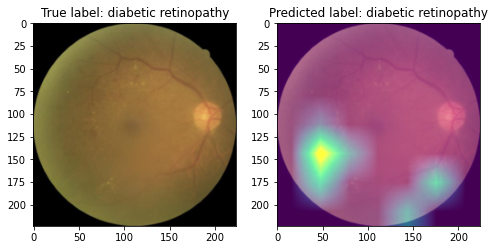

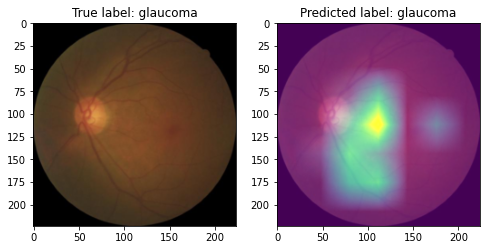

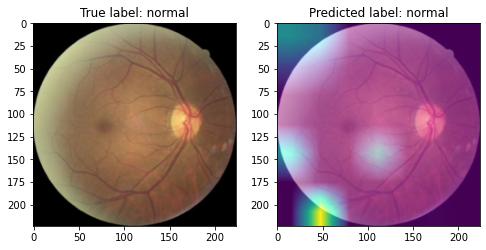

In [6]:
import tf_explain
tf.config.run_functions_eagerly(True)
for strlabel, label in valid_generator.class_indices.items():
    img, true_label, predicted_label = get_prediction(label)
    explainer = tf_explain.core.GradCAM()
    grid = explainer.explain(([img], None), model.layers[0], class_index=label)
    f, ax = plt.subplots(1,2,figsize = (8,8))
    ax[0].set_title("True label: " + get_class_string_from_index(true_label))
    ax[0].imshow(img)
    ax[1].set_title("Predicted label: " + get_class_string_from_index(predicted_label))
    ax[1].imshow(grid)